In [1]:
# !pip install krippendorff

In [46]:
import pandas as pd
import json
import glob

## Leitura dos dados

In [69]:
feedbacks = []
for name in glob.glob('./export*/*.json'):
    with open(name, "r") as feedback:
        feedbacks += json.load(feedback)
feedbacks = pd.DataFrame(feedbacks)

def change_corresponding(row):
    for elem in row["corresponding"]:
        elem["query"] = row["text"]
        elem["query_id"] = row["_id"]
    return row["corresponding"]
feedbacks["corresponding"] = feedbacks.apply(lambda row: change_corresponding(row) ,axis=1)

feedbacks = pd.json_normalize(feedbacks.explode("corresponding")["corresponding"])
feedbacks = feedbacks[feedbacks["labels"].apply(lambda x: bool(x))]
feedbacks["label"] = feedbacks["labels"].apply(lambda x: 1 if x[0]["label"]["name"] == "Relevante" else 0)
feedbacks["query"] = feedbacks["query"].apply(lambda x: x.replace("CONSULTA: ", ""))
feedbacks

,text,_id,labels,query,query_id,label
300,\n\nDocumento:20000110607\n\n\n\n\nPoder Judic...,72ie2H0BazwYFyie8dgm,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1
301,\n\nDocumento:20000006496\n\n\n\n\nPoder Judic...,B2eH2H0BazwYFyieir4V,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1
302,\n\nDocumento:20000085491\n\n\n\n\nPoder Judic...,J2if2H0BazwYFyiel-E3,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1
303,\n\nDocumento:20000020010\n\n\n\n\nPoder Judic...,rmmo2H0BazwYFyienEO8,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1
304,\n\nDocumento:20000006495\n\n\n\n\nPoder Judic...,BmeH2H0BazwYFyieir4V,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1
...,...,...,...,...,...,...
745,\n \n \n \n ...,7mZr2H0BazwYFyierH5c,[{'label': {'id': '791b77df-7956-41b6-8442-5ec...,partes anuentes,2a8cfd63-c0fa-480b-8ed7-344c0b86a8d6,0
746,\n \n \n \n ...,aWZs2H0BazwYFyieC4FA,[{'label': {'id': '791b77df-7956-41b6-8442-5ec...,partes anuentes,2a8cfd63-c0fa-480b-8ed7-344c0b86a8d6,0
747,\n \n \n \n ...,lWZt2H0BazwYFyieKY2S,[{'label': {'id': '791b77df-7956-41b6-8442-5ec...,partes anuentes,2a8cfd63-c0fa-480b-8ed7-344c0b86a8d6,0
748,\n \n \n \n ...,c2Zu2H0BazwYFyiebZw-,[{'label': {'id': '791b77df-7956-41b6-8442-5ec...,partes anuentes,2a8cfd63-c0fa-480b-8ed7-344c0b86a8d6,0


In [70]:
feedbacks[["text", "query", "label"]]

,text,query,label
300,\n\nDocumento:20000110607\n\n\n\n\nPoder Judic...,planos de saúde,1
301,\n\nDocumento:20000006496\n\n\n\n\nPoder Judic...,planos de saúde,1
302,\n\nDocumento:20000085491\n\n\n\n\nPoder Judic...,planos de saúde,1
303,\n\nDocumento:20000020010\n\n\n\n\nPoder Judic...,planos de saúde,1
304,\n\nDocumento:20000006495\n\n\n\n\nPoder Judic...,planos de saúde,1
...,...,...,...
745,\n \n \n \n ...,partes anuentes,0
746,\n \n \n \n ...,partes anuentes,0
747,\n \n \n \n ...,partes anuentes,0
748,\n \n \n \n ...,partes anuentes,0


## Análise

In [71]:
scores = feedbacks.groupby(["_id", "query_id"])["label"].mean().to_frame()
scores["count"] = feedbacks.groupby(["_id", "query_id"])["label"].count()
scores

,,label,count
_id,query_id,,
-2d92H0BazwYFyieslD-,b4bb355d-e105-4b58-9bd1-c4421b89a058,1.0,1
-2id2H0BazwYFyiewsrT,40456087-473f-44f4-9aeb-6b8a61205c20,1.0,2
02Zt2H0BazwYFyiehJGF,a564b353-a905-4d5e-87d3-e50179a75e5c,0.0,1
02eE2H0BazwYFyie_Z-f,515c91af-935b-44a0-9034-2c067e06d796,0.0,1
0meK2H0BazwYFyieed7Q,a2f20a89-329a-4781-9ac3-80b3e1df8a93,1.0,2
...,...,...,...
zGmj2H0BazwYFyie5Q7v,d630e749-49cc-468e-a974-5f8cf9e609cc,1.0,1
zWeB2H0BazwYFyieX3dP,b4bb355d-e105-4b58-9bd1-c4421b89a058,1.0,1
zWid2H0BazwYFyielMjT,38ff53de-7e90-4dbb-b912-40a8c8c63de4,0.0,1


In [72]:
scores["label"].value_counts()

0.0    186
1.0     84
0.5     30
Name: label, dtype: int64

<AxesSubplot:>

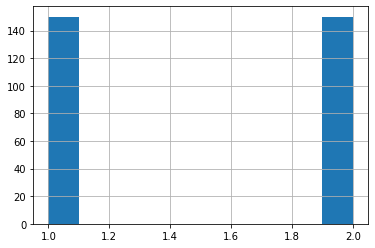

In [73]:
scores["count"].hist()

In [74]:
dataset = scores #need to save it here

### Apenas entradas com todos os rótulos

In [75]:
all_scores = scores[scores["count"] == 2]

<AxesSubplot:>

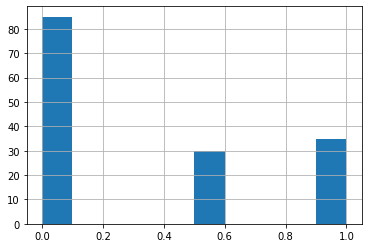

In [76]:
all_scores["label"].hist()

In [77]:
all_scores["label"].value_counts()

0.0    85
1.0    35
0.5    30
Name: label, dtype: int64

In [78]:
print("Observed agreement: ", 1 - (len([i for i in list(all_scores["label"]) if i == 0.5]) / len(all_scores)))

Observed agreement:  0.8


# Inter-rater agreement


* Fleiss’s Kappa is an extension of Cohen’s kappa for three raters or more. In addition, the assumption with Cohen’s kappa is that your raters are deliberately chosen and fixed. With Fleiss’ kappa, the assumption is that your raters were chosen at random from a larger population.

* Kendall’s Tau is used when you have ranked data, like two people ordering 10 candidates from most preferred to least preferred.

* Krippendorff’s alpha is useful when you have multiple raters and multiple possible ratings.

### Kappas

In [79]:
scores = feedbacks.groupby(["_id", "query_id"])["label"].apply(list).to_frame()
scores["count"] = feedbacks.groupby(["_id", "query_id"])["label"].count()
all_scores = scores[scores["count"] == 2]

In [80]:
rater1 = [i[0] for i in list(all_scores["label"])]
rater2 = [i[1] for i in list(all_scores["label"])]

In [81]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(rater1, rater2)

0.5556872037914692

In [82]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1400/1*mHB6Ciljb4OnOacNWgc0aw.png')

### Krippendorff

In [83]:
feedbacks["entry"] = feedbacks.apply(lambda row: row["_id"] + row["query_id"] ,axis=1)
feedbacks["user"] = feedbacks["labels"].apply(lambda x: x[0]["user"]["id"])
feedbacks.head(3)

,text,_id,labels,query,query_id,label,entry,user
300,\n\nDocumento:20000110607\n\n\n\n\nPoder Judic...,72ie2H0BazwYFyie8dgm,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1,72ie2H0BazwYFyie8dgm001404da-7082-4c96-8300-dd...,01c719b5-ec9b-481a-b8a4-76e85867e599
301,\n\nDocumento:20000006496\n\n\n\n\nPoder Judic...,B2eH2H0BazwYFyieir4V,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1,B2eH2H0BazwYFyieir4V001404da-7082-4c96-8300-dd...,01c719b5-ec9b-481a-b8a4-76e85867e599
302,\n\nDocumento:20000085491\n\n\n\n\nPoder Judic...,J2if2H0BazwYFyiel-E3,[{'label': {'id': '9e2e8d1f-46c7-452f-a202-f25...,planos de saúde,001404da-7082-4c96-8300-dd7836fb8f47,1,J2if2H0BazwYFyiel-E3001404da-7082-4c96-8300-dd...,01c719b5-ec9b-481a-b8a4-76e85867e599


In [84]:
import random
import numpy as np
import krippendorff
users_strings = {}

for user in feedbacks["user"].unique():
    users_strings[user] = []

for entry in feedbacks["entry"].unique():
    f = feedbacks[feedbacks["entry"] == entry]
    for user in feedbacks["user"].unique():
        if user in list(f["user"]):
            users_strings[user] += [f[f["user"] == user].iloc[0]["label"]]
        else:
            users_strings[user] += [np.nan]

reliability_data = list(users_strings.values())
np.array(reliability_data).dtype.kind
value = krippendorff.alpha(reliability_data=reliability_data, value_domain=[0, 1], level_of_measurement="nominal")
print("Krippendorff's alpha: ", value)

Krippendorff's alpha:  0.5515000000000001


The minimum acceptable alpha coefficient should be chosen according to the importance of the conclusions to be drawn from imperfect data. When the costs of mistaken conclusions are high, the minimum alpha needs to be set high as well. In the absence of knowledge of the risks of drawing false conclusions from unreliable data, social scientists commonly rely on data with reliabilities α ≥ 0.800, consider data with 0.800 > α ≥ 0.667 only to draw tentative conclusions, and discard data whose agreement measures α < 0.667

## Criação do dataset

In [85]:
dataset["final_label"] = dataset["label"].apply(lambda x: int(bool(x)))
dataset = dataset.reset_index()
dataset

,_id,query_id,label,count,final_label
0,-2d92H0BazwYFyieslD-,b4bb355d-e105-4b58-9bd1-c4421b89a058,1.0,1,1
1,-2id2H0BazwYFyiewsrT,40456087-473f-44f4-9aeb-6b8a61205c20,1.0,2,1
2,02Zt2H0BazwYFyiehJGF,a564b353-a905-4d5e-87d3-e50179a75e5c,0.0,1,0
3,02eE2H0BazwYFyie_Z-f,515c91af-935b-44a0-9034-2c067e06d796,0.0,1,0
4,0meK2H0BazwYFyieed7Q,a2f20a89-329a-4781-9ac3-80b3e1df8a93,1.0,2,1
...,...,...,...,...,...
295,zGmj2H0BazwYFyie5Q7v,d630e749-49cc-468e-a974-5f8cf9e609cc,1.0,1,1
296,zWeB2H0BazwYFyieX3dP,b4bb355d-e105-4b58-9bd1-c4421b89a058,1.0,1,1
297,zWid2H0BazwYFyielMjT,38ff53de-7e90-4dbb-b912-40a8c8c63de4,0.0,1,0
298,zWie2H0BazwYFyie8dkn,06b31304-b1bf-4d89-af61-d1d61904afe0,0.5,2,1


In [86]:
dataset = pd.merge(dataset, feedbacks,  left_on=['_id','query_id'], right_on = ['_id','query_id'])[['_id','query_id', "final_label","query", "text"]]

In [87]:
dataset

,_id,query_id,final_label,query,text
0,-2d92H0BazwYFyieslD-,b4bb355d-e105-4b58-9bd1-c4421b89a058,1,título executivo extrajudicial prescrito,\n\nDocumento:20000034808\n\n\n\n\nPoder Judic...
1,-2id2H0BazwYFyiewsrT,40456087-473f-44f4-9aeb-6b8a61205c20,1,interesse recursal quanto ao pedido principal,\n\nDocumento:20000025597\n\n\n\n\nPoder Judic...
2,-2id2H0BazwYFyiewsrT,40456087-473f-44f4-9aeb-6b8a61205c20,1,interesse recursal quanto ao pedido principal,\n\nDocumento:20000025597\n\n\n\n\nPoder Judic...
3,02Zt2H0BazwYFyiehJGF,a564b353-a905-4d5e-87d3-e50179a75e5c,0,crédito já habilitado,\n \n \n \n ...
4,02eE2H0BazwYFyie_Z-f,515c91af-935b-44a0-9034-2c067e06d796,0,prescrição acórdão confirmatório,\n\nDocumento:20000044815\n\n\n\n\nPoder Judic...
...,...,...,...,...,...
445,zWeB2H0BazwYFyieX3dP,b4bb355d-e105-4b58-9bd1-c4421b89a058,1,título executivo extrajudicial prescrito,\n\nDocumento:20000035039\n\n\n\n\nPoder Judic...
446,zWid2H0BazwYFyielMjT,38ff53de-7e90-4dbb-b912-40a8c8c63de4,0,causalidade adequada,\n\nDocumento:20000098766\n\n\n\n\nPoder Judic...
447,zWie2H0BazwYFyie8dkn,06b31304-b1bf-4d89-af61-d1d61904afe0,1,padrão de vida do alimentando,\n\nDocumento:20000071783\n\n\n\n\nPoder Judic...
448,zWie2H0BazwYFyie8dkn,06b31304-b1bf-4d89-af61-d1d61904afe0,1,padrão de vida do alimentando,\n\nDocumento:20000071783\n\n\n\n\nPoder Judic...


<AxesSubplot:>

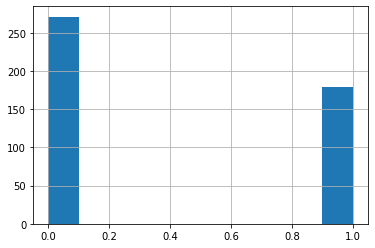

In [88]:
dataset["final_label"].hist()

## Treinamento e teste

In [92]:
def average_similarity():
    from tqdm import tqdm
    from scipy import spatial
    false_pairs, true_pairs = 0, 0
    SAMPLE_SIZE = 50
    for idx, row in tqdm(dataset.iloc[:SAMPLE_SIZE].iterrows(), total=SAMPLE_SIZE):
        output = model.encode([row["query"], row["text"]])
        sim = spatial.distance.cosine(output[0][0], output[0][1])
        if row["final_label"]:
            true_pairs += 1 - sim
        else:
            false_pairs += 1 - sim
    print("Média de similaridade dos positivos: ", true_pairs / SAMPLE_SIZE)
    print("Média de similaridade dos negativos: ", false_pairs / SAMPLE_SIZE)

In [30]:
from sentence_transformers import SentenceTransformer, LoggingHandler, util, models, evaluation, losses, InputExample
from torch import nn
from torch.utils.data import DataLoader

word_embedding_model = models.Transformer('neuralmind/bert-base-portuguese-cased', max_seq_length=150)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

/home/rennan/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rennan/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rennan/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rennan/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [93]:
average_similarity()

100%|██████████| 50/50 [00:40<00:00,  1.22it/s]

Média de similaridade dos positivos:  0.059999996423721315
Média de similaridade dos negativos:  0.019999995231628417


In [ ]:
from tqdm import tqdm

examples = []
for idx, row in tqdm(dataset.iterrows(), total=len(dataset)):
    examples.append(InputExample(texts=[row["query"], row["text"]], label=float(row["final_label"])))
dataloader = DataLoader(examples, shuffle=True, batch_size=8)
train_loss = losses.CosineSimilarityLoss(model)
model.fit(train_objectives=[(dataloader, train_loss)], epochs=1, warmup_steps=50)

100%|██████████| 450/450 [00:00<00:00, 1775.17it/s]


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/57 [00:00<?, ?it/s]

In [ ]:
average_similarity()